In [1]:
from scipy import stats
from sklearn.metrics import pairwise_distances
import numpy as np 
import copy 

import os

import matplotlib.pyplot as plt 
from jupyterthemes import jtplot
jtplot.style("grade3")

In [2]:
def similarity(a, b):
    l2 = pairwise_distances(a.reshape(1,-1), b.reshape(1,-1), metric="euclidean")
    cos = pairwise_distances(a.reshape(1,-1), b.reshape(1,-1), metric="cosine")
    
    print("l2: %.3f, cos: %.3f"%(l2, cos))

In [3]:
PATH = './kstest/'
gradients = []
for _, _, files in os.walk(PATH):
    for file in files:
        gradients.append(np.loadtxt(PATH+file))

In [4]:
avg_ori = np.mean(gradients, axis=0)
print(np.linalg.norm(avg_ori))

13.522045711328829


In [5]:
l2_norms = []
for i in range(10):
    l2_norms.append(np.linalg.norm(gradients[i]))
bound = np.median(l2_norms)

In [6]:
dp_gradients = copy.deepcopy(gradients)
count = 0 
for i in range(10):
    if l2_norms[i] > bound:
        dp_gradients[i] *= bound/l2_norms[i]
        count += 1
    dp_gradients[i] += np.random.normal(0, 1*bound, size=dp_gradients[i].shape)/10
print("num_clipped:%d"%count)

num_clipped:5


In [7]:
avg_dp = np.mean(dp_gradients, axis=0)
print(np.linalg.norm(avg_dp))
similarity(avg_ori, avg_dp)
print()

if np.linalg.norm(avg_dp) > bound:
    avg_post = bound/np.linalg.norm(avg_dp) * avg_dp
print(np.linalg.norm(avg_post))
similarity(avg_ori, avg_post)
print()

99.37383287460642
l2: 98.438, cos: 0.863

14.79427112051777
l2: 18.626, cos: 0.863



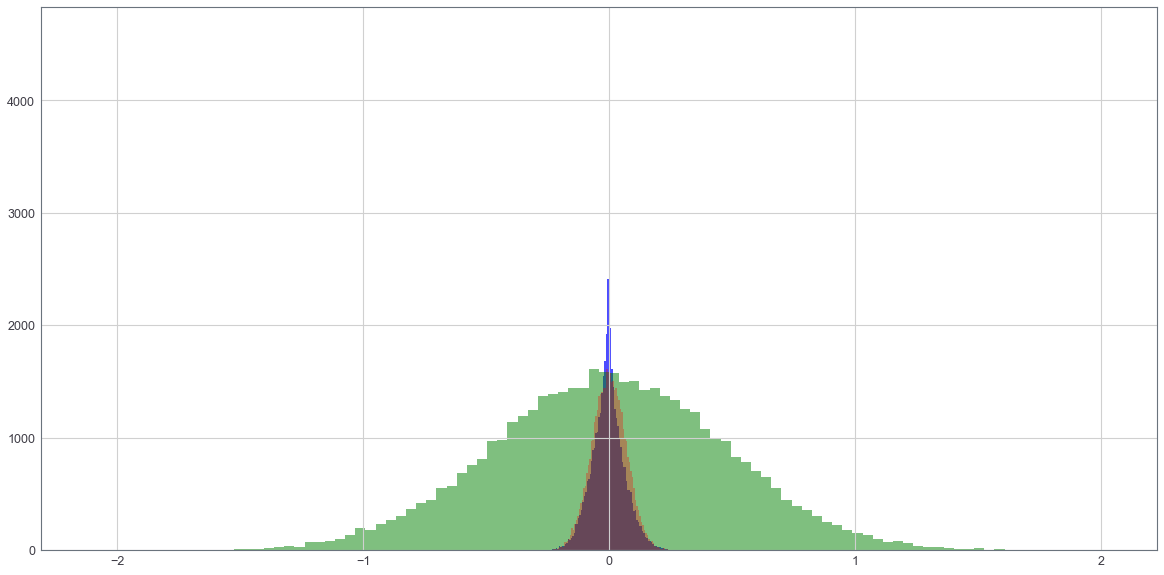

In [8]:
plt.figure(figsize=(20,10))
plt.hist(avg_ori, bins=100, alpha=0.7, color="blue")[2]
plt.hist(avg_dp, bins=100, alpha=0.5, color="green")[2]
plt.hist(avg_post, bins=100, alpha=0.3, color="red")[2]
plt.show()